# Confusable Detector

Full tutorial for setting up, building and deploying confusable detector.

### Typical runtime for each part

- Setup: 2 minutes
- Dataset generation: 20 minutes
- Classifier training: 2 days
- Triplet training: 2-3 days
- Representaion clustering module initialization: 2 mins
- Get confusables for one character: 2-5 seconds

## Setup

### Install required packages (run once)

In [1]:
! ./scripts/setup.sh

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease                        
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:4 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [890 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]    
Get:6 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [9834 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [1043 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [101 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates/restricted amd64 Packages [117 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates/multiverse amd64 Packages [27.4 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [1418 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/mai

debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package multiarch-support.
(Reading database ... 15987 files and directories currently installed.)
Preparing to unpack .../0-multiarch-support_2.27-3ubuntu1.2_amd64.deb ...
Unpacking multiarch-support (2.27-3ubuntu1.2) ...
Selecting previously unselected package libxau6:amd64.
Preparing to unpack .../1-libxau6_1%3a1.0.8-1ubuntu1_amd64.deb ...
Unpacking libxau6:amd64 (1:1.0.8-1ubuntu1) ...
Selecting previously unselected package libbsd0:amd64.
Preparing to unpack .../2-libbsd0_0.8.7-1ubuntu0.1_amd64.deb ...
Unpacking libbsd0:amd64 (0.8.7-1ubuntu0.1) ...
Selecting previously unselected package libxdmcp6:amd64.
Preparing to unpack .../3-libxdmcp6_1%3a1.1.2-3_amd64.deb ...
Unpacking libxdmcp6:amd64 (1:1.1.2-3) ...
Selecting previously unselected package libxcb1:amd64.
Preparing to unpack .../4-libxcb1_1.13-2~ubuntu18.04_amd64.deb ...
Unpacking libxcb1:amd64 (1.13-2~ubuntu18.04) ...
Sel

Unpacking libxdamage1:amd64 (1:1.1.4-3) ...
Selecting previously unselected package libxfixes3:amd64.
Preparing to unpack .../38-libxfixes3_1%3a5.0.3-1_amd64.deb ...
Unpacking libxfixes3:amd64 (1:5.0.3-1) ...
Selecting previously unselected package libxshmfence1:amd64.
Preparing to unpack .../39-libxshmfence1_1.3-1_amd64.deb ...
Unpacking libxshmfence1:amd64 (1.3-1) ...
Selecting previously unselected package libglx-mesa0:amd64.
Preparing to unpack .../40-libglx-mesa0_20.0.8-0ubuntu1~18.04.1_amd64.deb ...
Unpacking libglx-mesa0:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Selecting previously unselected package libglx0:amd64.
Preparing to unpack .../41-libglx0_1.0.0-2ubuntu2.3_amd64.deb ...
Unpacking libglx0:amd64 (1.0.0-2ubuntu2.3) ...
Selecting previously unselected package libgl1:amd64.
Preparing to unpack .../42-libgl1_1.0.0-2ubuntu2.3_amd64.deb ...
Unpacking libgl1:amd64 (1.0.0-2ubuntu2.3) ...
Selecting previously unselected package libgl1-mesa-glx:amd64.
Preparing to unpack .../43-libgl1-

  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=5672 sha256=e74d9f8c326402f2fe8569d5dd05f3cf8b7fc61df5544d4d9837b187cb9bd658
  Stored in directory: /root/.cache/pip/wheels/5d/79/e4/4e55effe206295359b37e0f9db3e68a1197ba396682807dadb
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=2397 sha256=3a8a7a8b69a412b774721840c5e9fe030932c174c42818233227115724d9a292
  Stored in directory: /root/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9681 sha256=35645a8e88ab995f0fbfce46796a0dfbb1f1d04cd51a55ff982fe25341b0c5e1
  Stored in directory: /root/.cache/pip/wheels/33/15/6e/df5f8336275e96e19599034a76f9cfd81c6ae15d2bf16c11ca
Successfully built easydict sklearn gdown
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Reading package lists... Done
Building dependency tree       
Reading state information...

In [1]:
from IPython.display import Image, display

## Generate Visualizations

In [2]:
from vis_gen import VisualGenerator
vg = VisualGenerator()

### Properties (settings)

In [3]:
vg.font_name

'Noto Sans CJK SC'

In [4]:
vg.font_size # Default font size for chrome browser

16

In [5]:
vg.image_size # Leave enough margin for data augmentation

20

In [6]:
vg.out_dir

'data'

In [7]:
vg.grayscale

False

In [8]:
vg.font_style = "SemiBold"
vg.font_style

'SemiBold'

In [9]:
vg.antialias = 'Default'
vg.antialias

'Default'

### For the purpose of demonstration, we temporarily change the font size to 40 and change out_dir to 'img_out'

In [10]:
vg.image_size = 42
vg.font_size = 40
vg.out_dir = 'img_out'

### Visualize single code point

In [11]:
vg.visualize_single('段')

/tf/img_out does not exist, creating directory...
New directory successfully created.


'/tf/img_out/U+6BB5_Noto Sans CJK SC_SemiBold_Default.png'

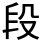

In [12]:
display(Image(filename='img_out/U+6BB5_Noto Sans CJK SC_SemiBold_Default.png'))

### Visualize range of code points

In [13]:
vg.visualize_range(start='\u4E05', end='\u4E09')

Visualizing 5 total code points from U+4E05 to U+4E09.
Now writing 1st code point.
Finished.
Images stored in directory /tf/img_out.


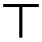

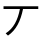

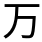

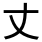

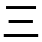

In [14]:
for i in range(ord('\u4E05'), ord('\u4E09')+1):
    display(Image(filename='img_out/U+'+ str(hex(i))[2:].upper()+'_Noto Sans CJK SC_SemiBold_Default.png'))

### Options for generating dataset

In [15]:
# Visualize availble styles for Noto Sans CJK
for style in ['Bold','Medium','Regular','DemiLight','Light','Thin']:
    vg.font_style = style
    vg.visualize_single('段')

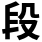

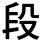

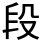

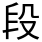

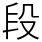

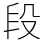

In [16]:
for style in ['Bold','Medium','Regular','DemiLight','Light','Thin']:
    display(Image(filename='img_out/U+6BB5_Noto Sans CJK SC_'+style+'_Default.png'))

In [17]:
# Visualize availble styles for Noto Sans CJK
vg.font_name = 'Noto Sans CJK SC'
vg.font_style = 'Regular'
for antialias in ['Default','Fast','Good','None']:
    vg.antialias = antialias
    vg.visualize_single('段')

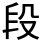

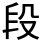

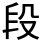

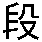

In [18]:
for antialias in ['Default','Fast','Good','None']:
    display(Image(filename='img_out/U+6BB5_Noto Sans CJK SC_Regular_'+antialias+'.png'))

## Generate Training Dataset

The source of code points to include in the dataset comes from `source/charset_1k.txt`. See `source/Radical-stroke Index Analysis.ipynb` for the methodoloty and process we used for choosing the dataset.

In [19]:
# vg.font_size = 16
# vg.image_size = 20
# vg.out_dir = 'data/charset_1k'
# for font_name in ['Noto Sans CJK SC', 'Noto Sans CJK JP','Noto Serif CJK TC', 'Noto Serif CJK KR']:
#     vg.font_name = font_name
#     vg.generate_dataset_from_file('source/charset_1k.txt', ['Bold','Medium','Regular','DemiLight','Light','Thin'],
#                                   ['Default','None'])

## Split Training and Testing Dataset

In [20]:
# from utils import train_test_split
# vg.out_dir = 'data/charset_1k'
# train_test_split(train_dir='data/charset_1k', test_dir='data/charset_1k_test', num_test=100)

The information printed out by `vg.train_test_split` is useful for creating TensorFlow dataset.

## Set Configuration for Model Training

In [21]:
! cat configs/sample_config.ini


[DATASET]
# Directory containing training images in png file format.
TRAIN_DATA_DIR = data/charset_1k
# Directory containing test images in png file format.
TEST_DATA_DIR = data/charset_1k_test
# Path to label file.
LABEL_FILE = source/charset_1k.txt

[IMAGE]
# Image height.
HEIGHT = 20
# Image width.
WIDTH = 20
# Format of the input image. If true, handled as grayscale image. If false,
# handled as RGB image.
GRAYSCALE_IN = False
# Format of the output image. If true, train model on grayscale image. If false,
# train model on RGB image.
GRAYSCALE_OUT = False

[TRAIN_TEST_SPEC]
# Training batch size.
TRAIN_BATCH_SIZE = 64
# Test batch size.
TEST_BATCH_SIZE = 1
# Size of the shuffling buffer. Setting it to a higher value will improve the
# shuffling but cost more time for get dataset.
SHUFFLE_BUFFER_SIZE = 200
# Allows next n entries to be read in and augmented while the training in
# on-going.
PREFETCH_BUFFER_SIZE = 20

[DATA_AUGMENTATION]
# If true, rotate the image by a random degre

Create new config file following the format of sample config to specify new training procedure.

## Get Pre-defined TensorFlow Models

In [22]:
from model_builder import ModelBuilder

In [23]:
custom_model = ModelBuilder('configs/sample_config.ini')

In [24]:
# Configurations
custom_model._INPUT_SHAPE

[32, 32, 3]

In [25]:
# Available models
print(custom_model._MODEL_MAP.keys())

dict_keys(['ResNet50', 'MobileNetV2', 'VGG16'])


In [26]:
# Get ResNet50 model
resnet_model, input_name = custom_model.create_full_model()

In [27]:
# See summary of full model
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              2049000   
Total params: 25,636,712
Trainable params: 25,583,592
Non-trainable params: 53,120
_________________________________________________________________


In [28]:
# See summary of inner model (ResNet50)
resnet_model.layers[0].summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [29]:
# See input tensor
resnet_model.input

<tf.Tensor 'resnet50_input:0' shape=(None, 32, 32, 3) dtype=float32>

In [30]:
# See output tensor
resnet_model.output

<tf.Tensor 'dense/Identity:0' shape=(None, 1000) dtype=float32>

## Get TensorFlow Dataset

In [31]:
from dataset_builder import DatasetBuilder

In [32]:
custom_dataset = DatasetBuilder('configs/sample_config.ini')

### Dataset metadata

In [33]:
custom_dataset._TRAIN_DATA_DIR

'data/charset_1k'

In [34]:
custom_dataset._TEST_DATA_DIR

'data/charset_1k_test'

In [35]:
custom_dataset._LABEL_FILE

'source/charset_1k.txt'

### Training configurations

In [36]:
custom_dataset._TRAIN_BATCH_SIZE

64

In [37]:
custom_dataset._TEST_BATCH_SIZE

1

## Nueral Network Training

The purpose of CNN model is to take an image of character as input, and produce a representation of that image in a high-dimensional space. To achieve that goal, we will utilize method of **Triplet Loss** and **Triplet Training** mentioned in FaceNet paper (https://arxiv.org/abs/1503.03832). However, **Triplet Loss** takes a very long time to converge, so we will use the method of transfer learning by following these procedures:
1. Train the CNN classificaton network with 1000 classes using cross entropy loss.
2. Freeze the first several layers of the CNN network so that the feature map will not change in training.
3. Disregard the final **logit** layer of the network.
4. Train the CNN encoder network with **triplet loss** using proper margin.

In [38]:
from custom_train import ModelTrainer

In [39]:
trainer = ModelTrainer('configs/sample_config.ini')

### Pre-defined learning rate schedule, optimizer, loss function and metrics

In [40]:
trainer._LR_SCHEDULE_MAP

{'ExponentialDecay': tensorflow.python.keras.optimizer_v2.learning_rate_schedule.ExponentialDecay,
 'PiecewiseConstantDecay': tensorflow.python.keras.optimizer_v2.learning_rate_schedule.PiecewiseConstantDecay,
 'PolynomialDecay': tensorflow.python.keras.optimizer_v2.learning_rate_schedule.PolynomialDecay}

In [41]:
trainer._OPTIMIZER_MAP

{'Adam': tensorflow.python.keras.optimizer_v2.adam.Adam,
 'RMSprop': tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop}

In [42]:
trainer._LOSS_MAP

{'CrossEntropy': tensorflow.python.keras.losses.CategoricalCrossentropy,
 'TripletHard': tensorflow_addons.losses.triplet.TripletHardLoss,
 'TripletSemiHard': tensorflow_addons.losses.triplet.TripletSemiHardLoss}

In [43]:
trainer._METRIC_MAP

{'Accuracy': tensorflow.python.keras.metrics.CategoricalAccuracy}

### Classification network training

Training takes more than 2 days to finish without dedicated hardware.

In [44]:
# trainer.train_classifier()

### Use tensorboard to monitor training metrics

Tensorboard procedures

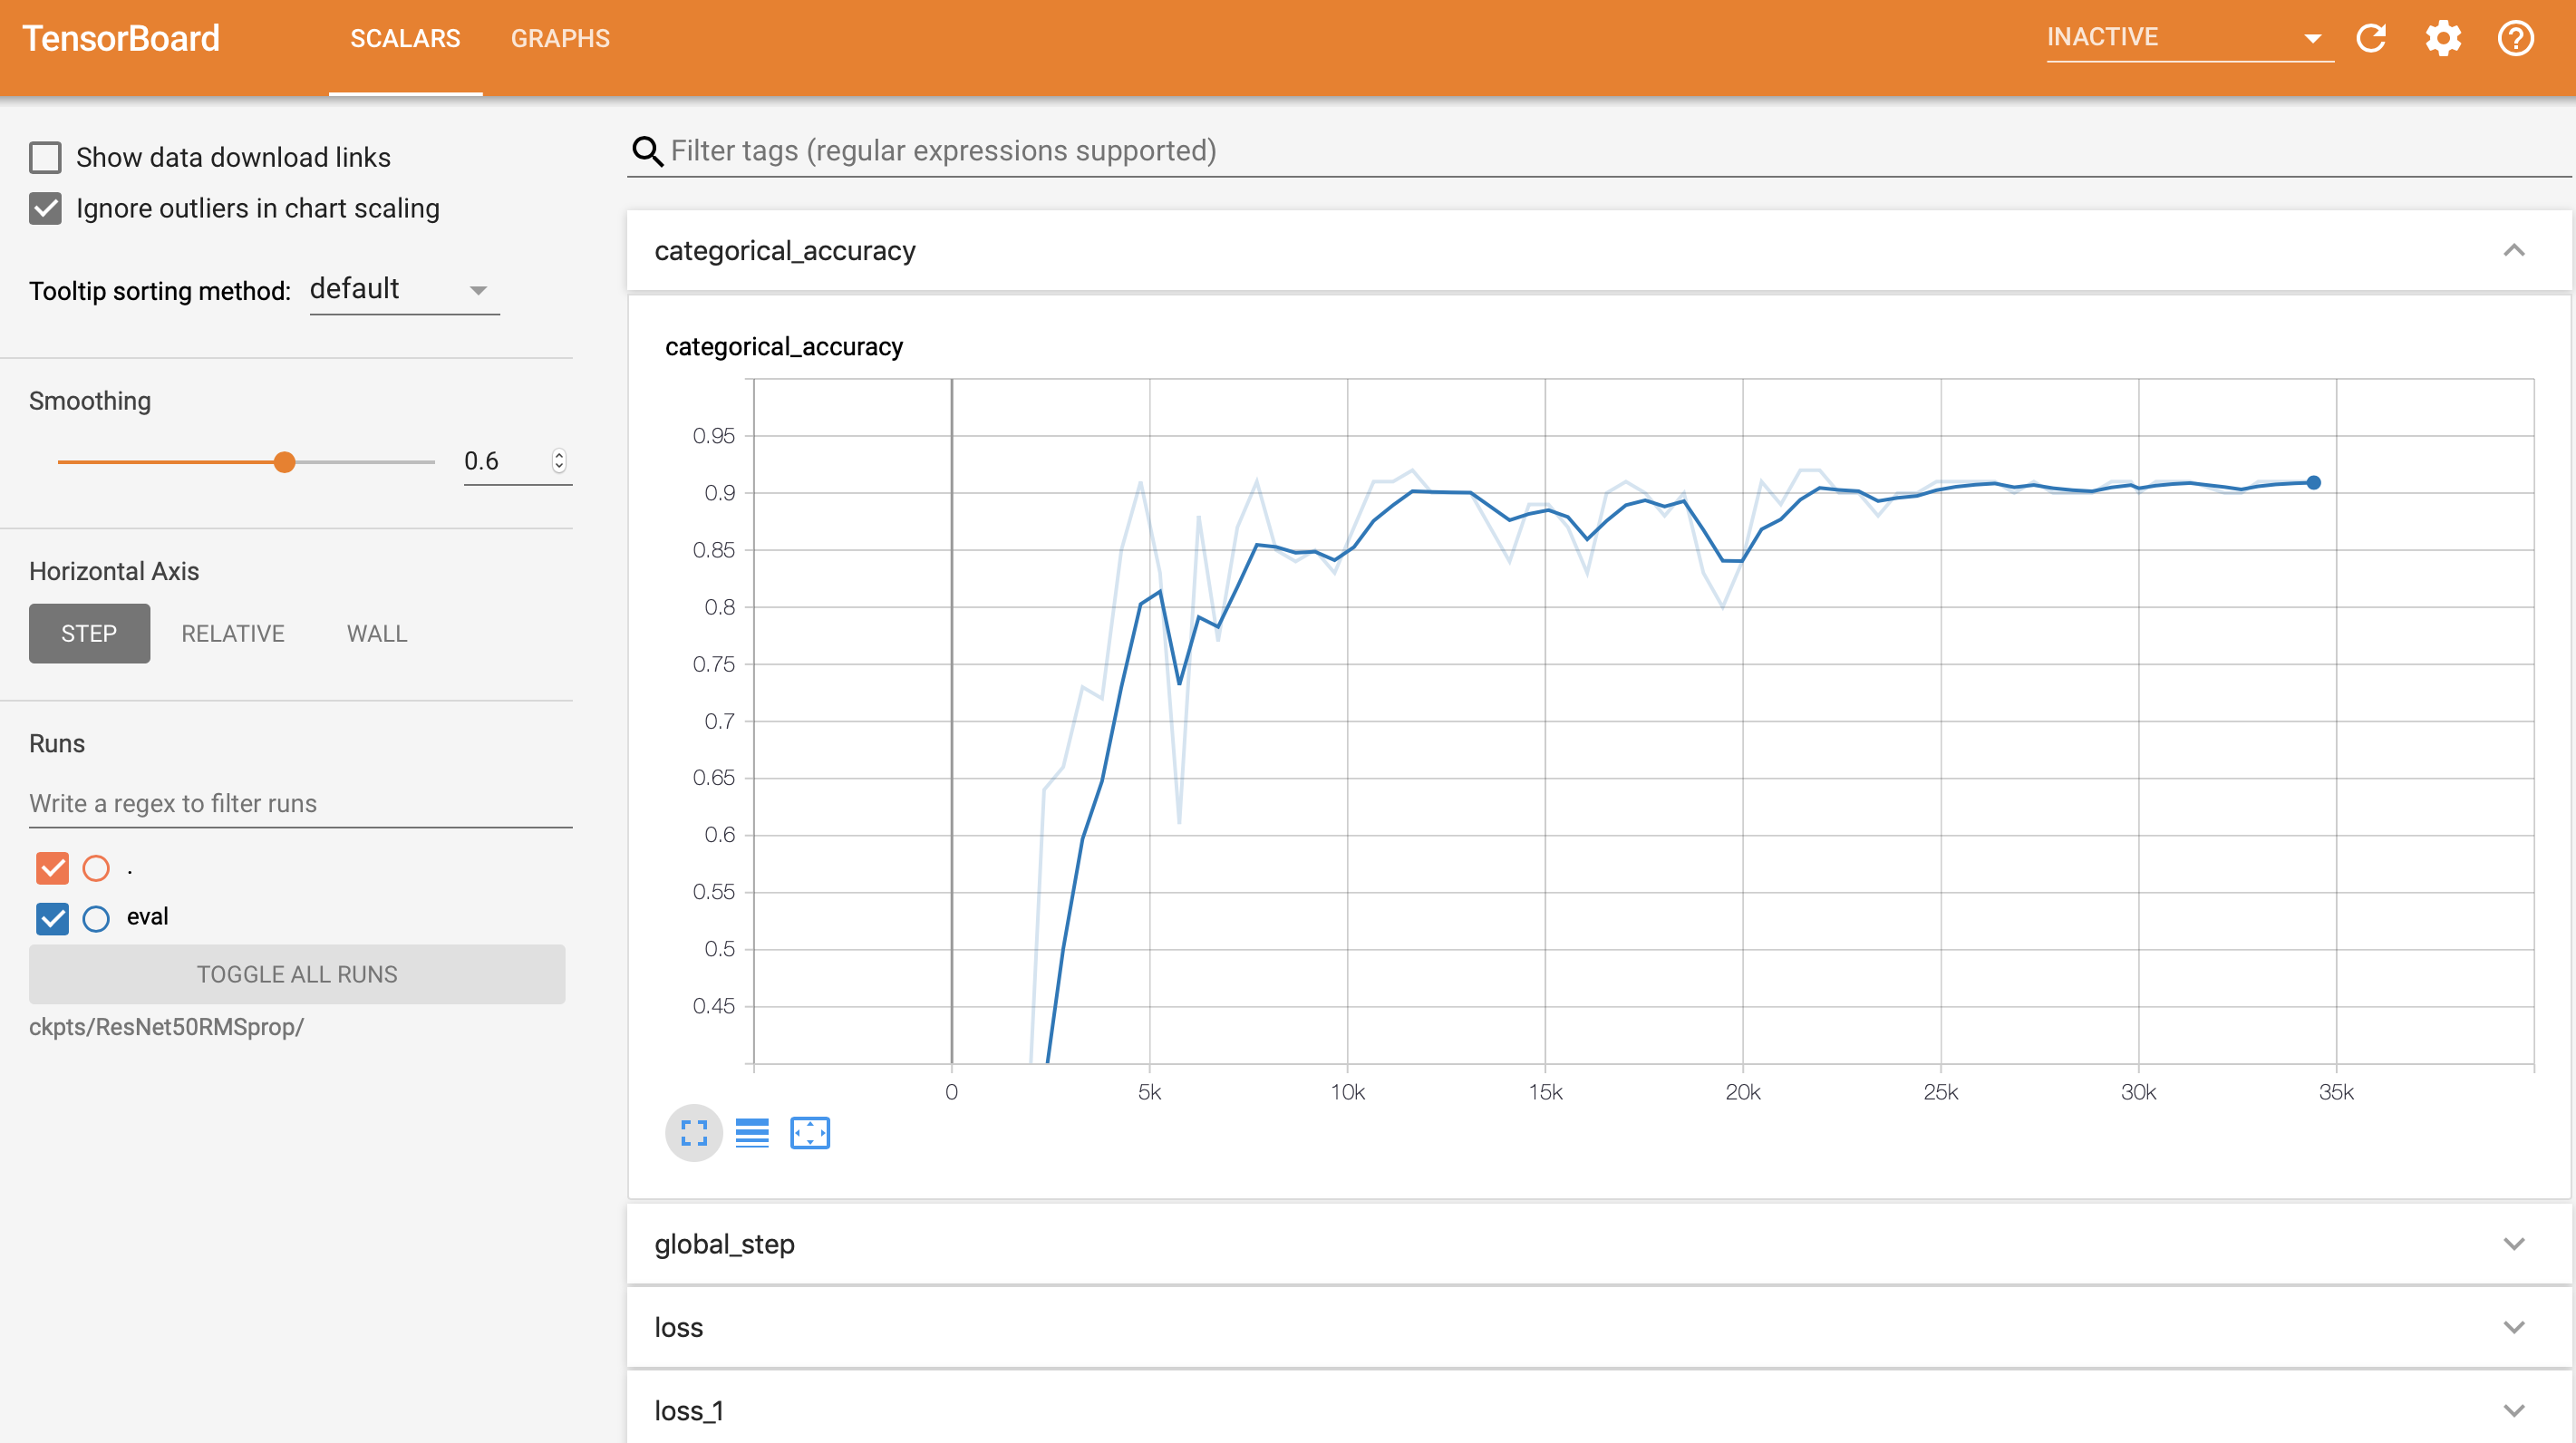

In [45]:
display(Image(filename='pictures/training_categorical_01.png'))

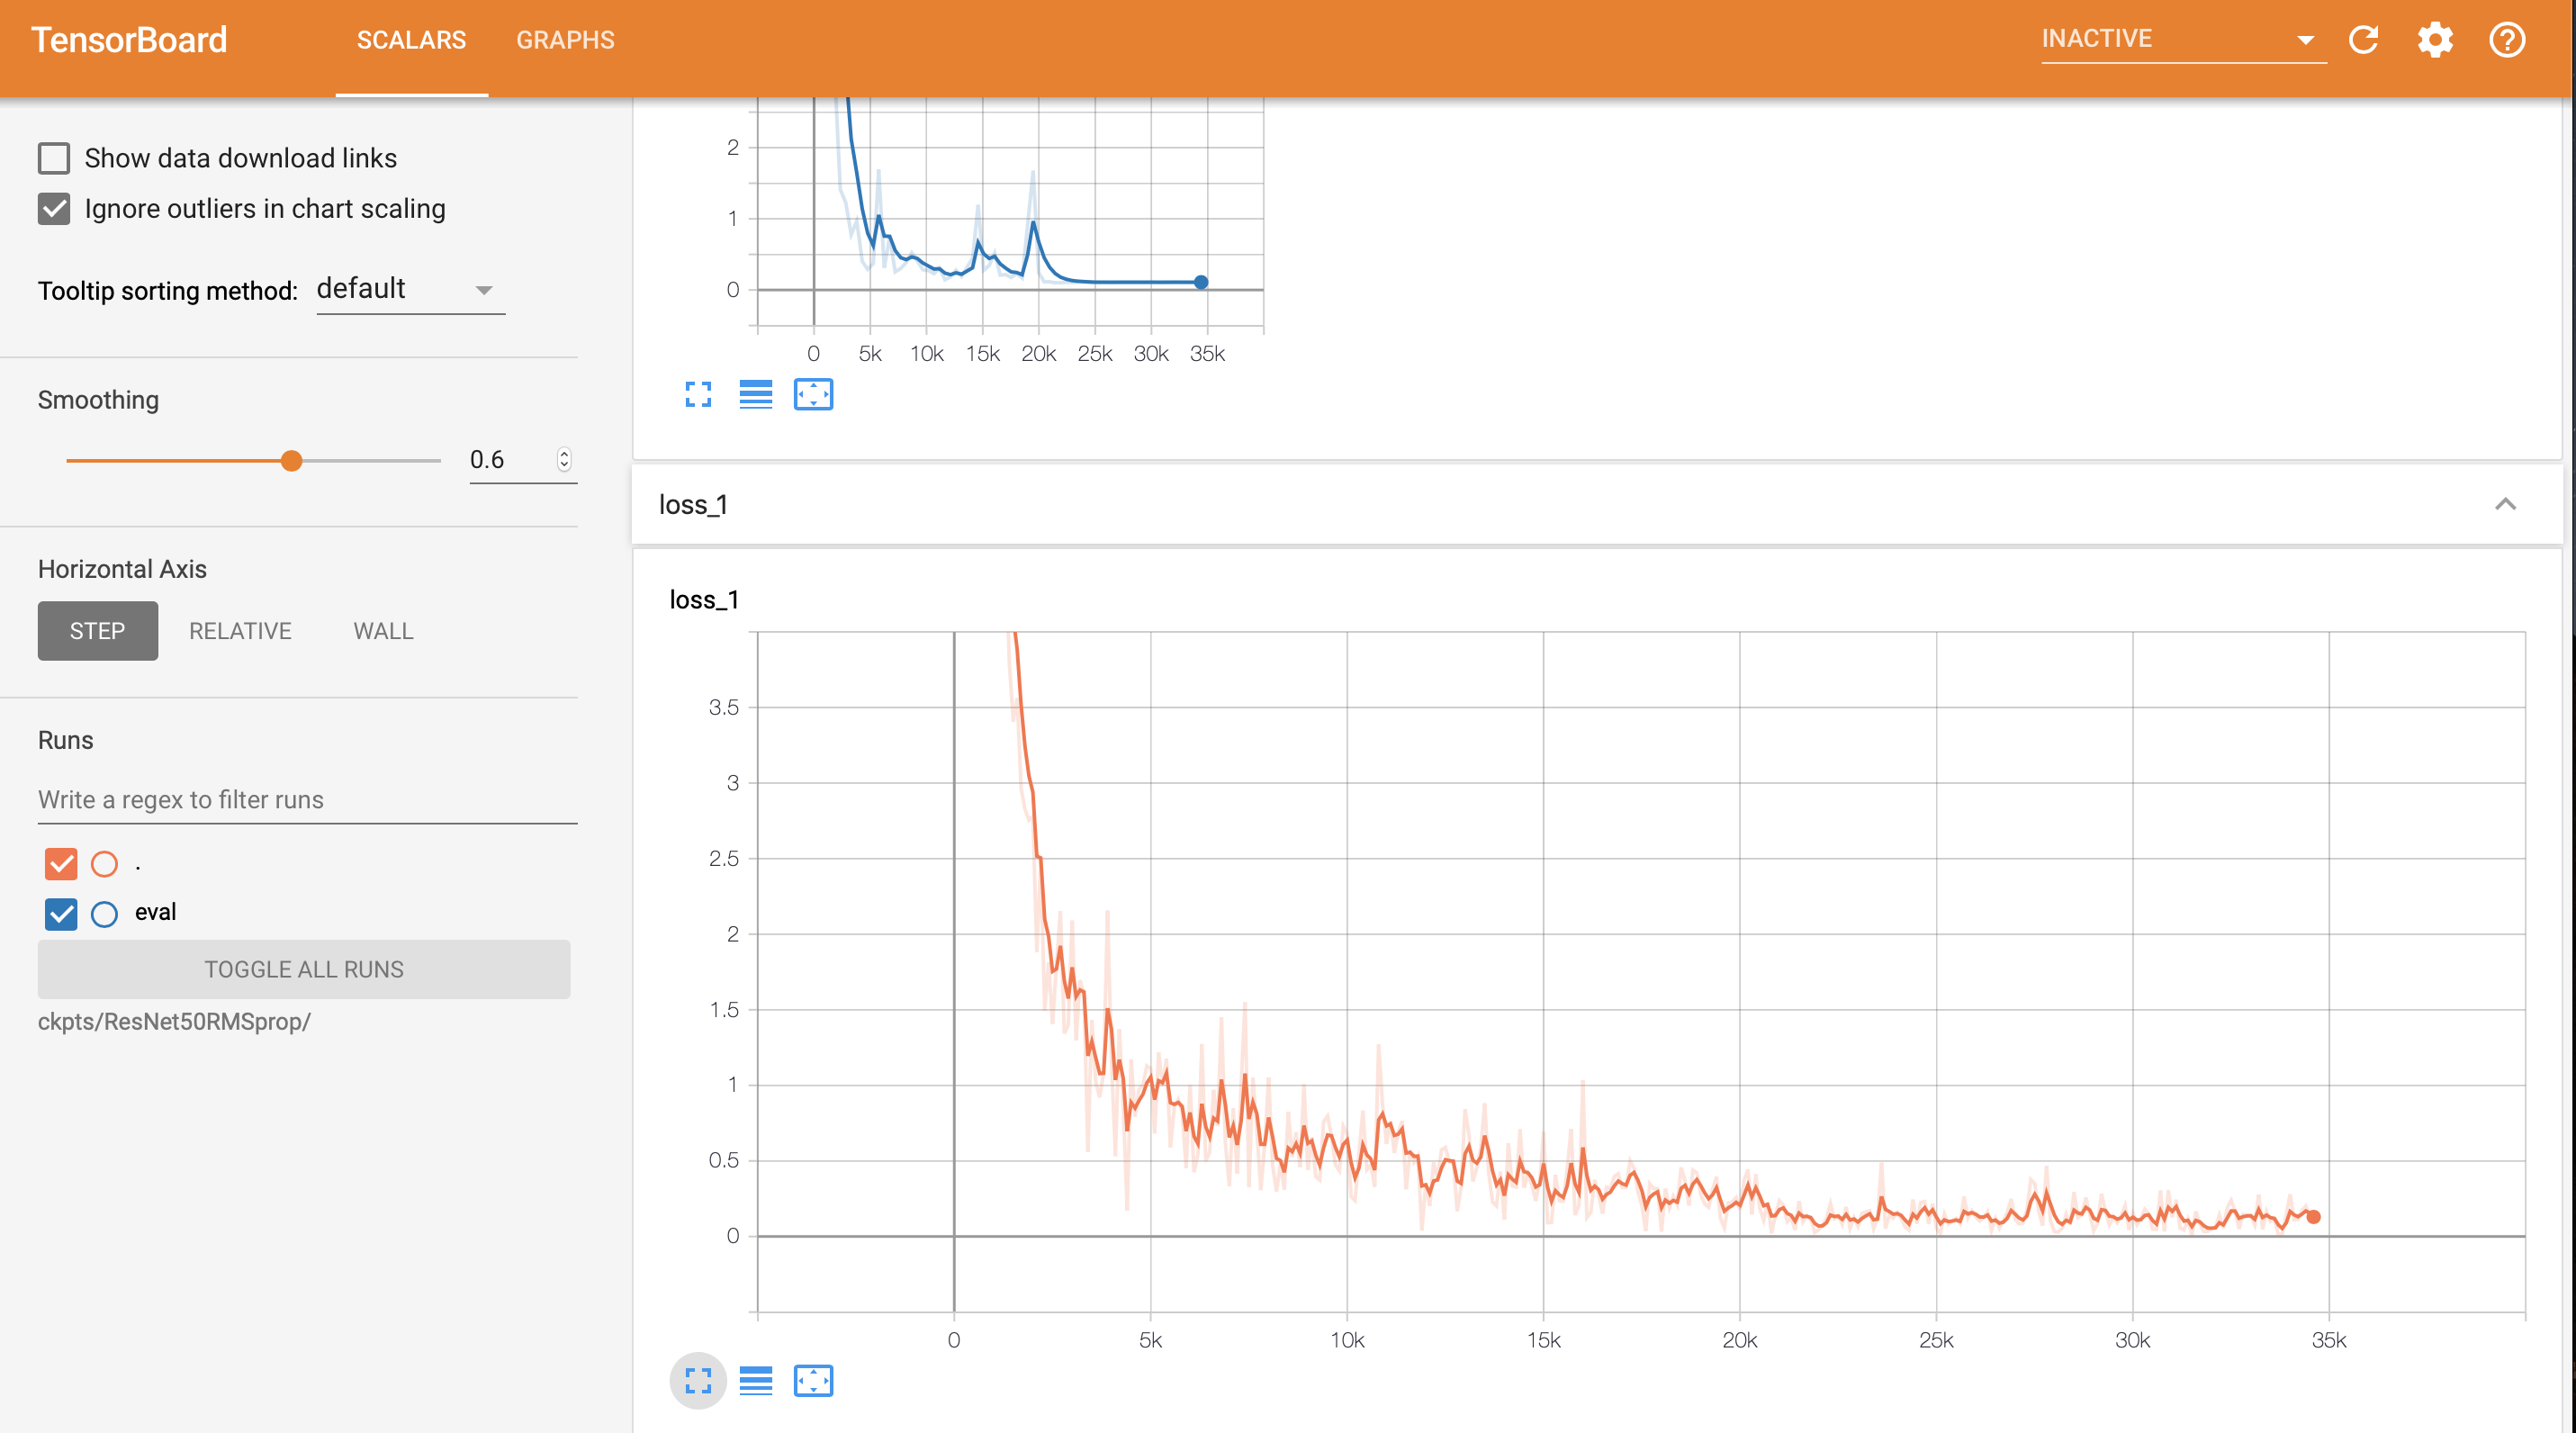

In [46]:
display(Image(filename='pictures/training_categorical_02.png'))

### Encoder network training

Training will take more than a day without dedicated hardware. Because the limitation of the hardware, we limit each dataset to have only 40 classes and keep batch size at 64. See https://omoindrot.github.io/triplet-loss for why this is needed.

In [47]:
# trainer.train_triplet_transfer()

**We provide pre-trained model in Google drive https://drive.google.com/drive/folders/1ipofZ-BiQzZemFI-aaVnNsciuMUn0zjb?usp=sharing.** 

The following cell downloads the required files and place them in `ckpts/TripletTransferTF` directory.

In [48]:
! ./scripts/download_model.sh

Downloading...
From: https://drive.google.com/uc?id=1ecONfCiBgz640V8zcAzwlJ_1SbI5ltqy
To: /tf/ckpts/TripletTransferTF/ResNet50Triplet.index
100%|██████████████████████████████████████| 44.7k/44.7k [00:00<00:00, 2.28MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WiKxLq3uQRgep_tg7YgUcjNAq-A3Kb3X
To: /tf/ckpts/TripletTransferTF/ResNet50Triplet.data-00000-of-00001
341MB [00:36, 9.43MB/s] 
Downloading...
From: https://drive.google.com/uc?id=12Fe2lVOT5yNV7wOja2vPvsb1iPbVbA53
To: /tf/ckpts/TripletTransferTF/checkpoint
100%|████████████████████████████████████████| 87.0/87.0 [00:00<00:00, 95.2kB/s]


## Generate Full Dataset

Generating images for all Han script code point until CJK extension A takes about 5 mins to finish.

In [49]:
# vg = VisualGenerator() # Reset all parameters
# vg.out_dir = 'data/full_data' # Change output directory
# # Generate data
# vg.generate_dataset_from_file('source/full_dataset.txt', ['Regular'], ['Default'])

**We provide pre-generated data in Google drive https://drive.google.com/file/d/10HjA5EDUylON9x_pJjsILzYeim-Twhsi/view?usp=sharing.**

The following cell downloads the required images and place them in `data/full_data` directory.

In [50]:
! ./scripts/download_data.sh

Downloading...
From: https://drive.google.com/uc?id=10HjA5EDUylON9x_pJjsILzYeim-Twhsi
To: /tf/data/full_data.zip
16.6MB [00:01, 9.00MB/s]


## Representation Generation

In [51]:
from rep_gen import RepresentationGenerator
rg = RepresentationGenerator('configs/sample_config.ini')

ResNet50 model successfully created.
Successfully loaded weights from ckpts/TripletTransferTF.


### Properties (settings)

In [52]:
rg.config_path # Path to config file

'configs/sample_config.ini'

In [53]:
rg.out_dir # Where the representations will be stored

'embeddings'

### Generate representations (embeddings) for full dataset

This will generate two files **full_data_triplet1.0_meta.tsv** (labels) and **full_data_triplet1.0_vec.tsv** (embeddings) in `embeddings/` directory. However, this generation will take a fairly long time.

In [54]:
# rg.write_embeddings_from_image(img_dir='data/full_data/', out_file='full_data_triplet1.0')

**We provide pre-generated embeddings and labels in Google drive https://drive.google.com/drive/folders/1QWUDridC499uqmXJJZYKgUf2fPmlgAeB?usp=sharing.**

The following cell downloads the required embedding file and label file and place them in `data/embeddings` directory.

In [55]:
! ./scripts/download_embeddings.sh

Downloading...
From: https://drive.google.com/uc?id=1zOeQw4-Z7jmK41msitxBFnAUm1j1QHQm
To: /tf/embeddings/full_data_triplet1.0_meta.tsv
100%|██████████████████████████████████████| 84.1k/84.1k [00:00<00:00, 2.61MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lQHPw7Q8UxZUP2GLz8uMX6cu3ei_XfCq
To: /tf/embeddings/full_data_triplet1.0_vec.tsv
547MB [01:09, 7.91MB/s] 


### Use TensorFlow embedding projector to visualize embeddings

**Go to website https://projector.tensorflow.org and choose to loada the embeddings and labels we generated.**

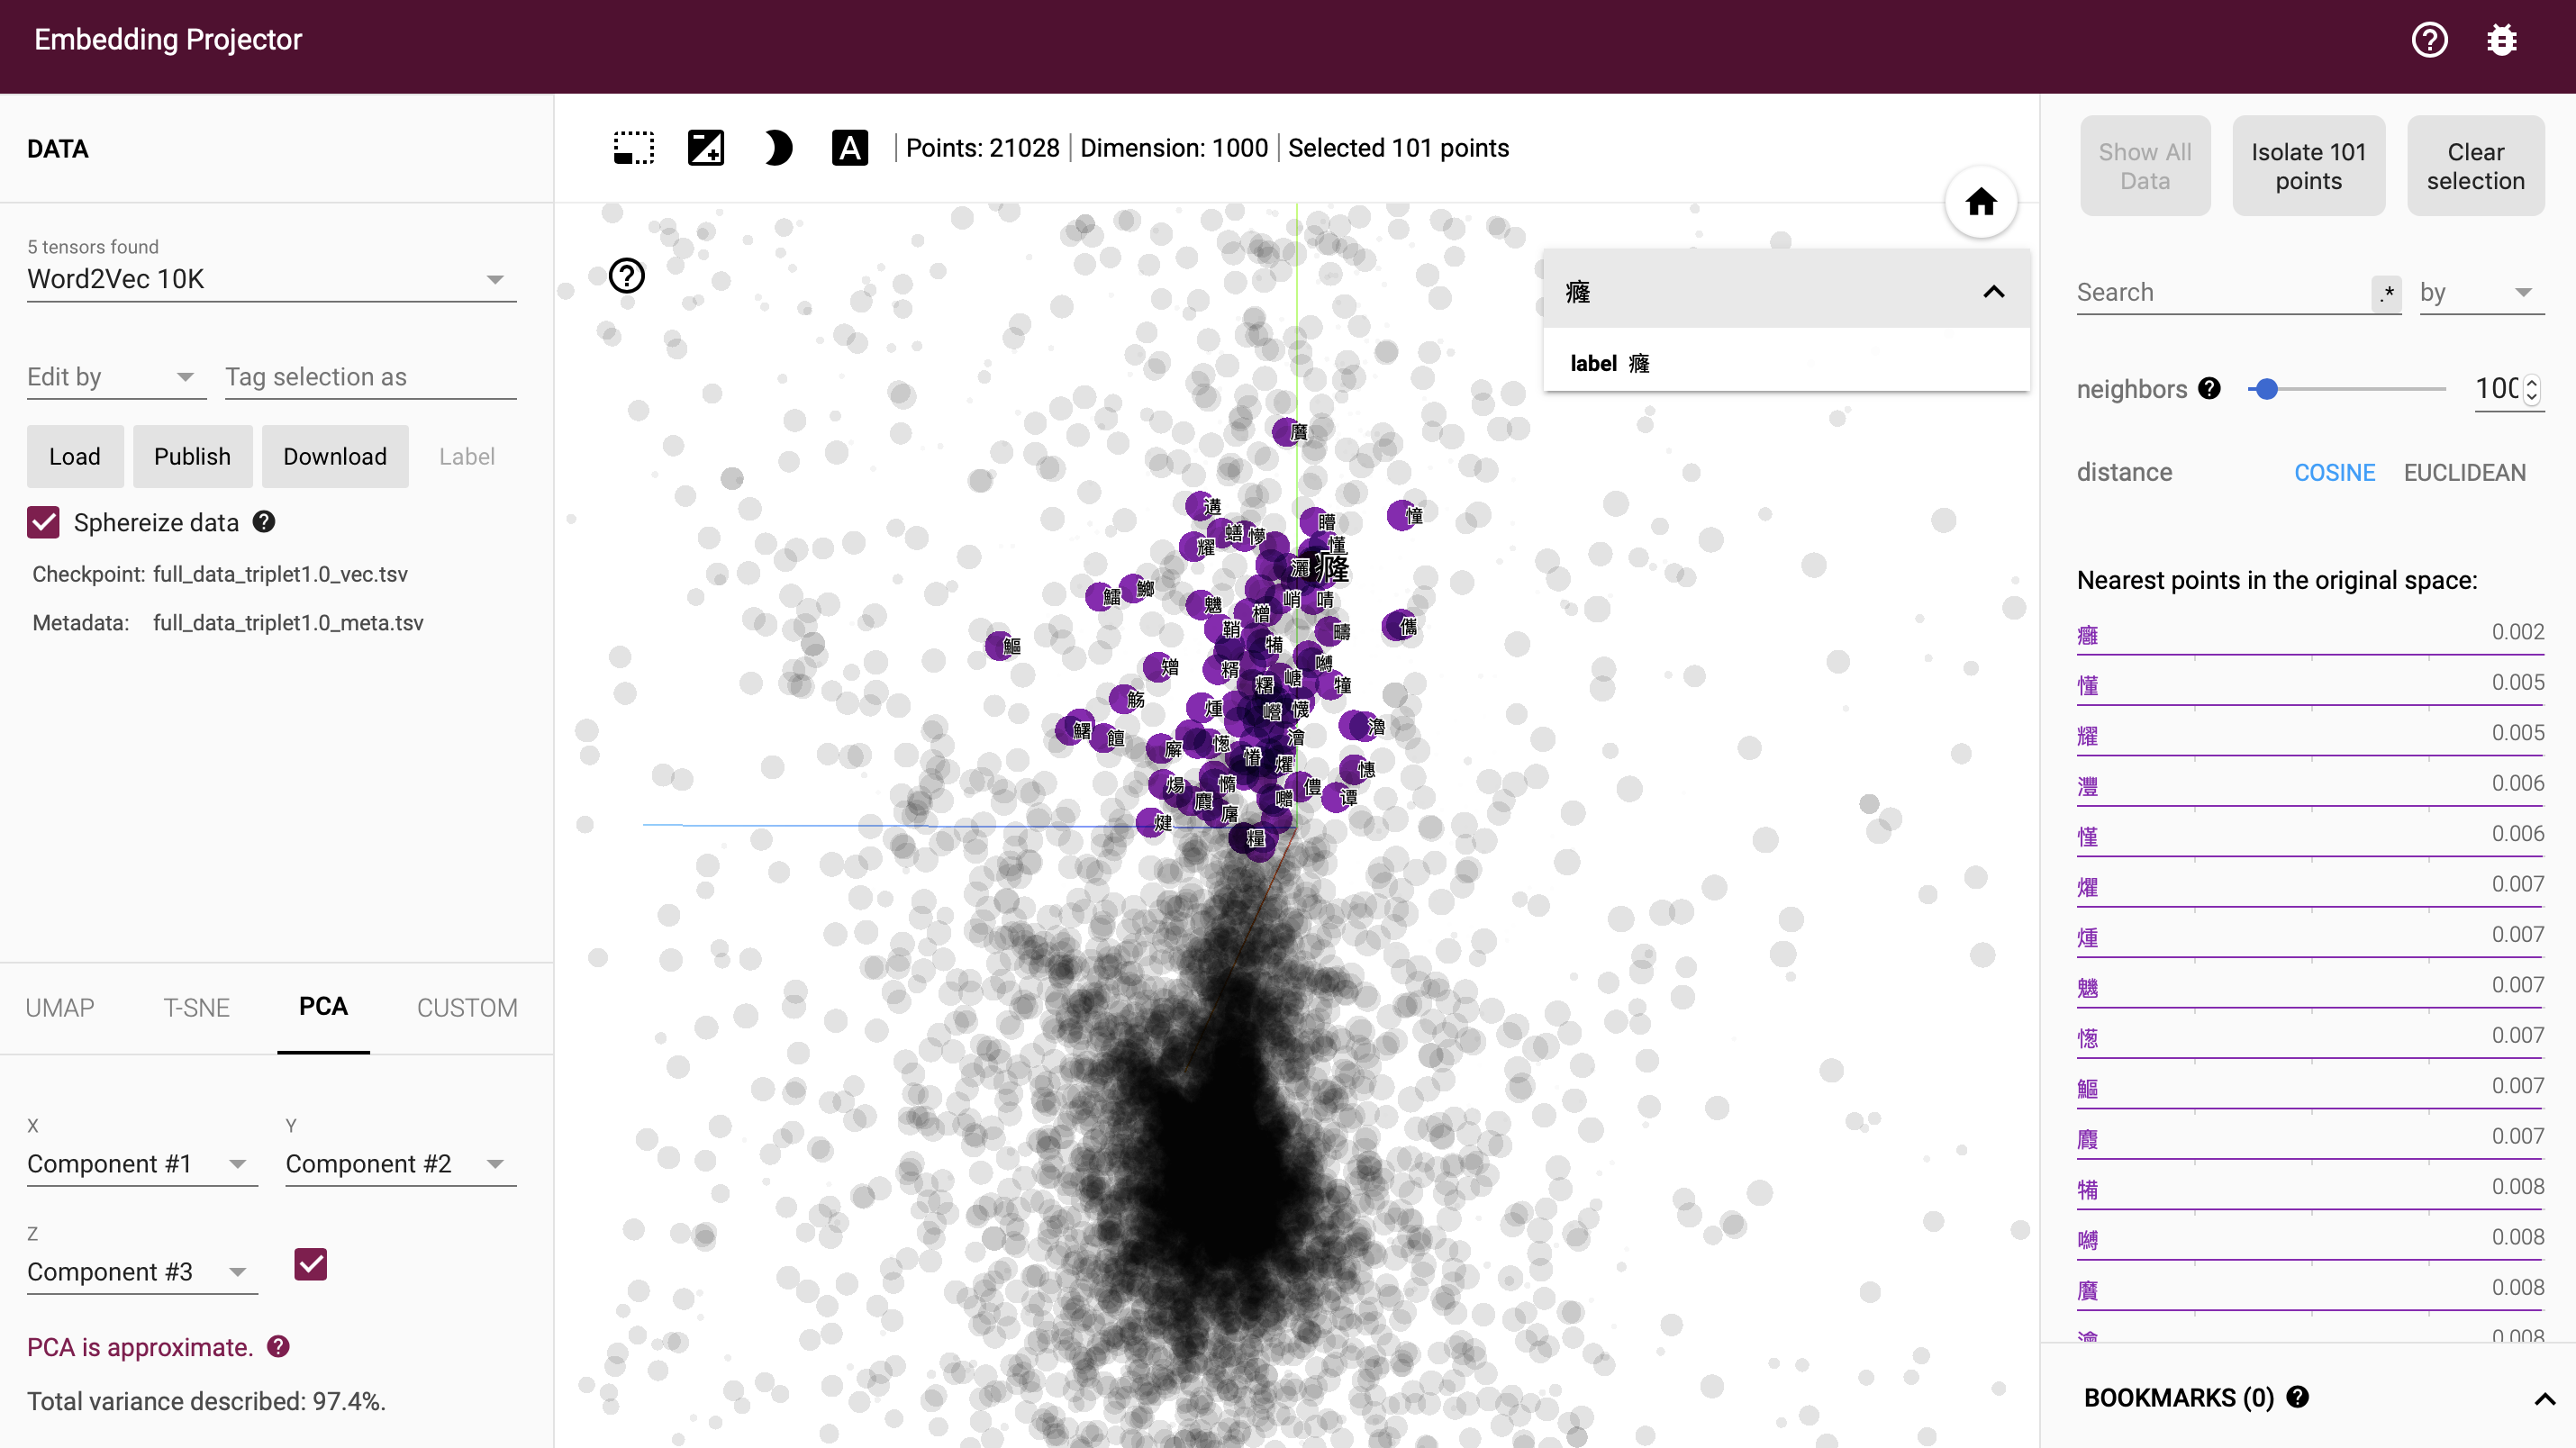

In [56]:
display(Image(filename='pictures/embedding_projector.png'))

## Distance Calculation

In [57]:
from distance_metrics import Distance, ImgFormat
distance = Distance(img_format=ImgFormat.RGB)

### List all image formats

In [58]:
list(ImgFormat)

[<ImgFormat.RGB: 1>,
 <ImgFormat.A8: 2>,
 <ImgFormat.A1: 3>,
 <ImgFormat.EMBEDDINGS: 4>]

### Get supported distance metrics for RGB image

In [59]:
metrics = distance.get_metrics()
metrics

{'manhattan': <bound method Distance._manhattan_distance_rgb of <distance_metrics.Distance object at 0x7fd9a1ff75c0>>,
 'sum_squared': <bound method Distance._sum_squared_distance_rgb of <distance_metrics.Distance object at 0x7fd9a1ff75c0>>,
 'cross_correlation': <bound method Distance._cross_correlation_distance_rgb of <distance_metrics.Distance object at 0x7fd9a1ff75c0>>}

### Calculate distance between two images

In [60]:
from utils import calculate_from_path

In [61]:
d = calculate_from_path(metric=metrics.cross_correlation, 
                                 path1='img_out/U+4E05_Noto Sans CJK SC_SemiBold_Default.png', 
                                 path2='img_out/U+4E06_Noto Sans CJK SC_SemiBold_Default.png')
print('Distance between {} and {} is {}'.format(chr(19973), chr(19974), d))

Distance between 丅 and 丆 is 0.9214158058166504


In [62]:
d = calculate_from_path(metric=metrics.cross_correlation, 
                                 path1='img_out/U+4E05_Noto Sans CJK SC_SemiBold_Default.png', 
                                 path2='img_out/U+4E08_Noto Sans CJK SC_SemiBold_Default.png')
print('Distance between {} and {} is {}'.format(chr(19973), chr(19976), d))

Distance between 丅 and 丈 is 0.8610314726829529


In [63]:
d = calculate_from_path(metric=metrics['cross_correlation'], 
                                 path1='img_out/U+4E05_Noto Sans CJK SC_SemiBold_Default.png', 
                                 path2='img_out/U+4E05_Noto Sans CJK SC_SemiBold_Default.png')
print('Distance between {} and {} is {}'.format(chr(19973), chr(19973), d))

Distance between 丅 and 丅 is 1.0


## Representation Clustering

In [ ]:
from rep_cls import RepresentationClustering
rc = RepresentationClustering(embedding_file='embeddings/full_data_triplet1.0_vec.tsv',
                              label_file='embeddings/full_data_triplet1.0_meta.tsv',
                              img_dir='data/full_data/')

Reading embeddings from file embeddings/full_data_triplet1.0_vec.tsv...
Successfully read from file embeddings/full_data_triplet1.0_vec.tsv.
Reading labels from file embeddings/full_data_triplet1.0_meta.tsv...
Successfully read from file embeddings/full_data_triplet1.0_meta.tsv.
Building PCA models.
Fitting PCA models.
Generating reduced embeddings as representations.


### Properties (settings)

In [ ]:
rc.embedding_file

In [ ]:
rc.label_file

In [ ]:
rc.img_dir

In [ ]:
rc.img_format

In [ ]:
rc.n_candidates # Number of candidates to consider when generating confusables

In [ ]:
rc.pca_dimensions # PCA is used to increase speed

In [ ]:
rc.primary_distance_type # Primary distance metric type to be used to filter N candidates

In [ ]:
rc.secondary_distance_type # Secondary distance metric type to be used to filter confusables

In [ ]:
rc.secondary_filter_threshold # Secondary distance metric threshold to be used to filter confusables

### Generate confusable clusters for single character

## 褢

In [ ]:
rc.get_confusables_for_char('褢')

## 黪

In [ ]:
rc.get_confusables_for_char('黪')

## 剌

In [ ]:
rc.get_confusables_for_char('剌')

## 閪

In [ ]:
rc.get_confusables_for_char('闞')

## 褘

In [ ]:
rc.get_confusables_for_char('褘')

## 柆

In [ ]:
rc.get_confusables_for_char('柆')

## 來

In [ ]:
rc.get_confusables_for_char('來')

## 几

In [ ]:
rc.get_confusables_for_char('几')

## 彈

In [ ]:
rc.get_confusables_for_char('彈')

## 暤

In [ ]:
rc.get_confusables_for_char('暤')

## 析

In [ ]:
rc.get_confusables_for_char('析')

## 钱

In [ ]:
rc.get_confusables_for_char('钱')

## 回

In [ ]:
rc.get_confusables_for_char('回')

## 外

In [ ]:
rc.get_confusables_for_char('外')